In [ ]:
# import packeges
import numpy as np
import matplotlib.pyplot as plt
import h5py
from functions import getRegionalData, build_dataset_with_holdout, singleSVMClassification

In [2]:
# load data from .mat file

data = h5py.File('D:/!Studying/NeuroData/ML/final_project_ML/Population-coding-in-an-Innately-Relevant-Olfactory-Area/region_sessions.mat')

list(data.keys())

['#refs#', 'x_pcx', 'x_plcoa']

In [3]:
"loop through the session, always leaving a differnt session for testing"

# 1 - Run build dataset builder for for each iteration with sess_index set to the loop index
# 2 - Run the classification function keeping the accuracies in a variable: "pseudoAcc" "trueAcc"
# 3 - Plot the accuracies as a distribution

X_pcx , X_plcoa = getRegionalData(data)

n_sessions = min(len(X_pcx), len(X_plcoa))
pseudoAcc, trueAcc = [],[]
for i in range(n_sessions):
    
    out  = build_dataset_with_holdout(X_pcx,X_plcoa, 10, sess_index = i) # Skip iteration if invalid
    if out is None:
        continue
    
    X , y, X_held, y_held = out
    # Run SVM classification
    
    p_Acc , t_Acc = singleSVMClassification(X, y, X_held, y_held)
    pseudoAcc.append(p_Acc)
    trueAcc.append(t_Acc)

svc accuracy on true population: 54.00%
svc accuracy on pseudo population: 70.33%
svc accuracy on true population: 58.67%
svc accuracy on pseudo population: 67.00%
svc accuracy on true population: 42.33%
svc accuracy on pseudo population: 70.00%
svc accuracy on true population: 50.00%
svc accuracy on pseudo population: 59.42%
svc accuracy on true population: 42.33%
svc accuracy on pseudo population: 70.67%
svc accuracy on true population: 55.33%
svc accuracy on pseudo population: 74.00%
svc accuracy on true population: 59.67%
svc accuracy on pseudo population: 65.15%
svc accuracy on true population: 52.67%
svc accuracy on pseudo population: 69.67%
svc accuracy on true population: 47.33%
svc accuracy on pseudo population: 65.33%
svc accuracy on true population: 50.67%
svc accuracy on pseudo population: 64.13%


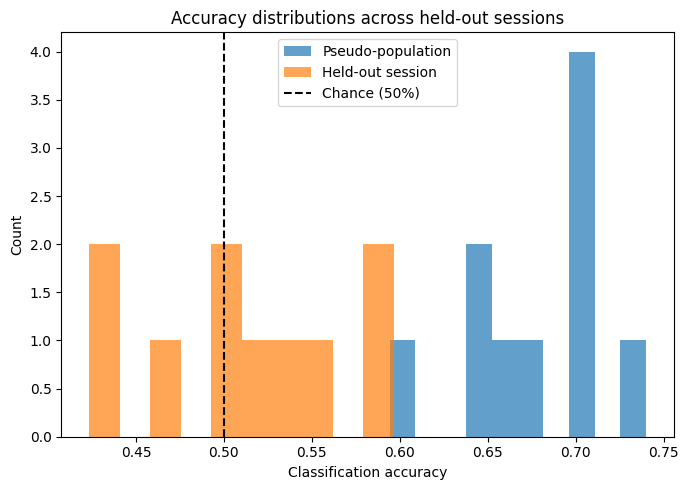

In [4]:
"plots plots plots"    

# Distribution

plt.figure(figsize=(7,5))

plt.hist(pseudoAcc, bins=10, alpha=0.7, label='Pseudo-population')
plt.hist(trueAcc, bins=10, alpha=0.7, label='Held-out session')

plt.axvline(0.5, color='k', linestyle='--', label='Chance (50%)')

plt.xlabel('Classification accuracy')
plt.ylabel('Count')
plt.title('Accuracy distributions across held-out sessions')
plt.legend()
plt.tight_layout()
plt.show()    

C:\Users\Kseniia Dubivka\AppData\Local\Temp\ipykernel_17564\1448967288.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(


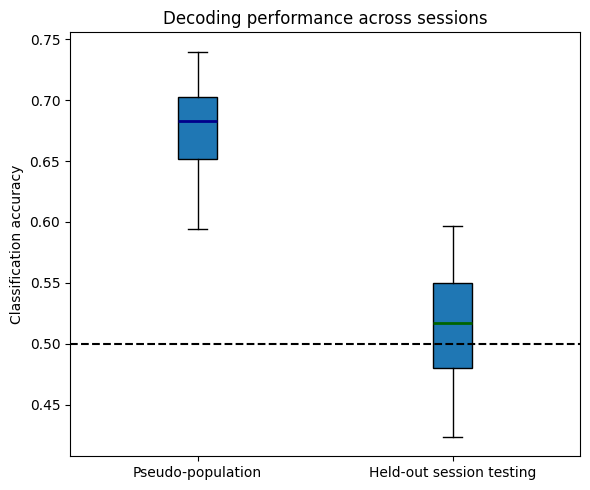

In [5]:
# Boxplot

plt.figure(figsize=(6,5))

bp = plt.boxplot(
    [pseudoAcc, trueAcc],
    labels=['Pseudo-population', 'Held-out session testing'],
    patch_artist=True,  # Still needed if you want colored boxes
    showfliers=True
)

# Change the color of the median lines
median_colors = ['darkblue', 'darkgreen']
for median, color in zip(bp['medians'], median_colors):
    median.set_color(color)
    median.set_linewidth(2)  # optional, for better visibility

plt.axhline(0.5, color='k', linestyle='--')

plt.ylabel('Classification accuracy')
plt.title('Decoding performance across sessions')
plt.tight_layout()
plt.show()

In [6]:
"Resample using variable N with all population"

# Optimising N for best performance
# Loop though building traing and testing to find the best N value : [5,10,15]

N_values = [5,10,15,17,20,22,25]
accuracies_N_varies = []
for i in range(len(N_values)):
    
    out  = build_dataset_with_holdout\
        (X_pcx,X_plcoa, N_values[i], sess_index = None)
        
    if out is None:
        continue
    X , y , X_held, y_held = out
    
    temp = singleSVMClassification(X, y)
    accuracies_N_varies.append(temp)
    
pseudo_acc = np.array([a[0] for a in accuracies_N_varies]) * 100

svc accuracy on pseudo population: 60.00%
svc accuracy on pseudo population: 70.30%
svc accuracy on pseudo population: 69.17%
svc accuracy on pseudo population: 72.00%
svc accuracy on pseudo population: 73.33%
svc accuracy on pseudo population: 79.44%
svc accuracy on pseudo population: 73.33%


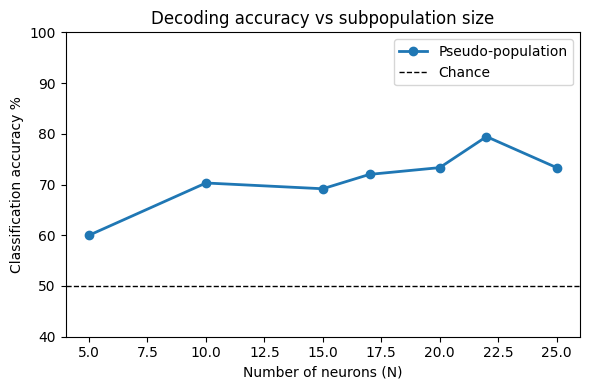

In [7]:
plt.figure(figsize=(6,4))

plt.plot(N_values, pseudo_acc, marker='o', linewidth=2, label='Pseudo-population')

plt.axhline(50, color='k', linestyle='--', linewidth=1, label='Chance')

plt.xlabel('Number of neurons (N)')
plt.ylabel('Classification accuracy %')
plt.title('Decoding accuracy vs subpopulation size')
plt.ylim(40, 100)
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
"Using the optimal N to resample 50 times to get a full distribution with all data"
accuracies_dist = []
rng = np.random.default_rng()
for i in range(50):
    out  = build_dataset_with_holdout\
        (X_pcx,X_plcoa, 20 , sess_index = None,rng= rng)
    if out is None:
        continue
    X , y , X_held, y_held = out
    
    temp = singleSVMClassification(X, y)
    accuracies_dist.append(temp)

svc accuracy on pseudo population: 73.33%
svc accuracy on pseudo population: 73.85%
svc accuracy on pseudo population: 75.38%
svc accuracy on pseudo population: 71.79%
svc accuracy on pseudo population: 71.79%
svc accuracy on pseudo population: 74.36%
svc accuracy on pseudo population: 68.72%
svc accuracy on pseudo population: 67.18%
svc accuracy on pseudo population: 74.87%
svc accuracy on pseudo population: 73.33%
svc accuracy on pseudo population: 78.97%
svc accuracy on pseudo population: 75.90%
svc accuracy on pseudo population: 75.38%
svc accuracy on pseudo population: 68.21%
svc accuracy on pseudo population: 75.38%
svc accuracy on pseudo population: 72.31%
svc accuracy on pseudo population: 71.79%
svc accuracy on pseudo population: 71.79%
svc accuracy on pseudo population: 71.79%
svc accuracy on pseudo population: 68.72%
svc accuracy on pseudo population: 72.31%
svc accuracy on pseudo population: 73.85%
svc accuracy on pseudo population: 69.74%
svc accuracy on pseudo population:

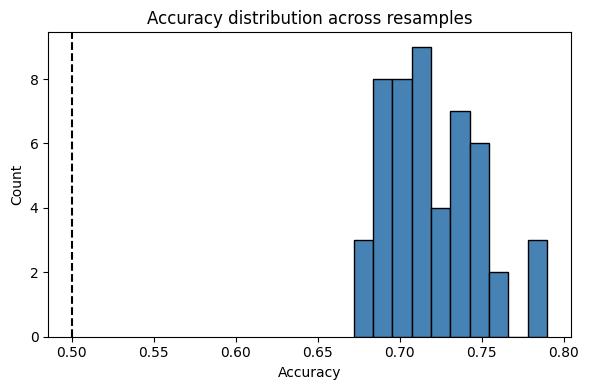

In [9]:
"Plotting"

acc = np.array([i[0] for i in accuracies_dist])
# histogram

plt.figure(figsize=(6,4))
plt.hist(acc, bins=10, color='steelblue', edgecolor='black')
plt.axvline(0.5, color='k', linestyle='--')

plt.xlabel('Accuracy')
plt.ylabel('Count')
plt.title('Accuracy distribution across resamples')
plt.tight_layout()
plt.show()

In [10]:
"Permutation test - building Null distribution"
observed_mean = np.mean(acc)


perm_means = []

rng = np.random.default_rng(123)

for p in range(50):
    perm_acc = []
    
    for i in range (50):
        out  = build_dataset_with_holdout\
            (X_pcx,X_plcoa, 20 , sess_index = None,rng= rng)
        if out is None:
            continue
        X , y , X_held, y_held = out
        
        y_perm = rng.permutation(y)
        
        P_acc = singleSVMClassification(X, y_perm)
        t = P_acc[0]
        
        perm_acc.append(t)
        
    perm_means.append(np.mean(perm_acc))

svc accuracy on pseudo population: 47.18%
svc accuracy on pseudo population: 49.23%
svc accuracy on pseudo population: 52.82%
svc accuracy on pseudo population: 55.38%
svc accuracy on pseudo population: 49.74%
svc accuracy on pseudo population: 55.38%
svc accuracy on pseudo population: 51.79%
svc accuracy on pseudo population: 64.10%
svc accuracy on pseudo population: 53.33%
svc accuracy on pseudo population: 58.46%
svc accuracy on pseudo population: 50.26%
svc accuracy on pseudo population: 48.72%
svc accuracy on pseudo population: 51.28%
svc accuracy on pseudo population: 50.26%
svc accuracy on pseudo population: 53.85%
svc accuracy on pseudo population: 54.36%
svc accuracy on pseudo population: 55.38%
svc accuracy on pseudo population: 57.95%
svc accuracy on pseudo population: 62.56%
svc accuracy on pseudo population: 54.36%
svc accuracy on pseudo population: 45.13%
svc accuracy on pseudo population: 53.33%
svc accuracy on pseudo population: 52.31%
svc accuracy on pseudo population:

In [11]:
# Compute p-value

perm_means = np.array(perm_means)

p_value = (1 + np.sum(perm_means >= observed_mean)) / (1 + len(perm_means))
    
print ("Permutation p-value:  ", p_value)

Permutation p-value:   0.0196078431372549


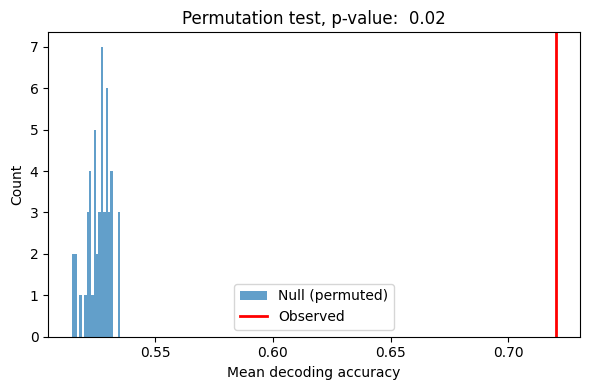

In [12]:
# Plotting

plt.figure(figsize=(6,4))
plt.hist(perm_means, bins=20, alpha=0.7, label='Null (permuted)')
plt.axvline(observed_mean, color='r', linewidth=2, label='Observed')

plt.xlabel('Mean decoding accuracy')
plt.ylabel('Count')
plt.title(f'Permutation test, p-value:  {round(p_value,3)}')
plt.legend()
plt.tight_layout()
plt.show()